In [1]:
# Installing the packages
import numpy as np
import pandas as pd
import seaborn as sns 
import datetime

In [2]:
df = pd.read_csv('GDAXI.csv') # File path description
df.size
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,1788.890015,1788.890015,1788.890015,1788.890015,1788.890015,0.0
1,1990-01-03,1867.290039,1867.290039,1867.290039,1867.290039,1867.290039,0.0
2,1990-01-04,1830.920044,1830.920044,1830.920044,1830.920044,1830.920044,0.0
3,1990-01-05,1812.900024,1812.900024,1812.900024,1812.900024,1812.900024,0.0
4,1990-01-08,1841.469971,1841.469971,1841.469971,1841.469971,1841.469971,0.0


In [3]:
df=df.drop(['Open', 'Volume', 'Adj Close'], axis=1)

In [4]:
df=df.dropna()
df.size

30784

In [5]:
print(df[80:90])

          Date         High          Low        Close
82  1990-04-26  1830.920044  1830.920044  1830.920044
83  1990-04-27  1817.800049  1817.800049  1817.800049
84  1990-04-30  1812.910034  1812.910034  1812.910034
86  1990-05-02  1835.810059  1835.810059  1835.810059
87  1990-05-03  1874.849976  1874.849976  1874.849976
88  1990-05-04  1904.849976  1904.849976  1904.849976
89  1990-05-07  1920.880005  1920.880005  1920.880005
90  1990-05-08  1910.180054  1910.180054  1910.180054
91  1990-05-09  1903.609985  1903.609985  1903.609985
92  1990-05-10  1884.900024  1884.900024  1884.900024


In [6]:
df.dtypes

Date      object
High     float64
Low      float64
Close    float64
dtype: object

In [7]:
time=pd.to_datetime(df.Date)
time.dtypes

dtype('<M8[ns]')

In [8]:
df.Date=pd.to_datetime(df.Date)
df.dtypes

Date     datetime64[ns]
High            float64
Low             float64
Close           float64
dtype: object

In [10]:
per = df.Date.dt.to_period("M")  # new way to get the same
close = df.groupby(per)
Dax_mean=close.mean()  # dang not quite what we want (doesn't fill in the gaps)
Dax_mean=Dax_mean.drop(['High', 'Low'], axis=1)
Dax_mean.head()

,Close
Date,
1990-01,1814.727728
1990-02,1855.806500
1990-03,1885.929560
1990-04,1893.963694
1990-05,1856.984753


In [13]:
high = df.groupby(per)
Dax_peak=high.max()  # dang not quite what we want (doesn't fill in the gaps)
Dax_peak=Dax_peak.drop(['Low', 'Close', 'Date'], axis=1)
Dax_peak.head()

,High
Date,
1990-01,1867.290039
1990-02,1939.819946
1990-03,1966.750000
1990-04,1965.910034
1990-05,1920.880005


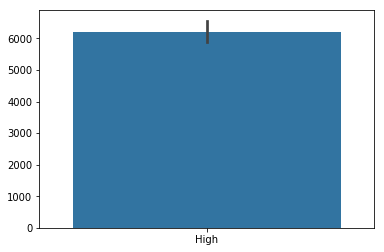

In [15]:
ax = sns.barplot(data=Dax_peak)

In [14]:
low = df.groupby(per)
Dax_low=high.min()  # dang not quite what we want (doesn't fill in the gaps)
Dax_low=Dax_low.drop(['High', 'Close', 'Date'], axis=1)
Dax_low.head()

,Low
Date,
1990-01,1751.619995
1990-02,1764.060059
1990-03,1796.180054
1990-04,1812.910034
1990-05,1803.250000
